Import Libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

Load the dataset and prepocess

In [4]:
data = pd.read_csv('/content/Student.csv')

In [5]:
data.head(10)

,Maths,Physics,Chemistry,Result
0,17,27,22,0
1,72,82,77,1
2,97,18,13,0
3,8,42,37,0
4,32,25,20,0
5,15,73,68,0
6,63,67,62,1
7,97,70,65,1
8,57,93,88,1
9,60,58,53,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Maths      1000 non-null   int64
 1   Physics    1000 non-null   int64
 2   Chemistry  1000 non-null   int64
 3   Result     1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


Train , Test and evaluate the model.


In [7]:
# Split the data into features (X) and target (y)
X = data[['Maths', 'Physics', 'Chemistry']]  # Features: Maths, Physics, Chemistry
y = data['Result']  # Target: Result (1 for Pass, 0 for Fail)

In [8]:
#Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = SVC()

In [10]:
#Train the model using the training data
model.fit(X_train, y_train)

SVC()

In [11]:
# Predict the results using the test data
y_pred = model.predict(X_test)

In [12]:
# Evaluate the SVC model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 96.00%


In [13]:
model = RandomForestClassifier()

In [14]:
#Train the model using the training data
model.fit(X_train, y_train)

RandomForestClassifier()

In [15]:
# Predict the results using the test data
y_pred = model.predict(X_test)

In [16]:
# Evaluate the RandomForestClassifier model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [17]:
model = KNeighborsClassifier()

In [18]:
#Train the  model using the training data
model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
# Predicting the results using the test data
y_pred = model.predict(X_test)


In [20]:
# Evaluating the KNeighbors model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.00%


In [21]:
model = DecisionTreeClassifier()

In [22]:
#Train the model using the training data
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [23]:
# Predict the results using the test data
y_pred = model.predict(X_test)

In [24]:
# Evaluate the DecisionTreeClassifier model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [25]:
#Display the confusion matrix
conf_matrix= confusion_matrix(y_test,y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[145   0]
 [  0  55]]


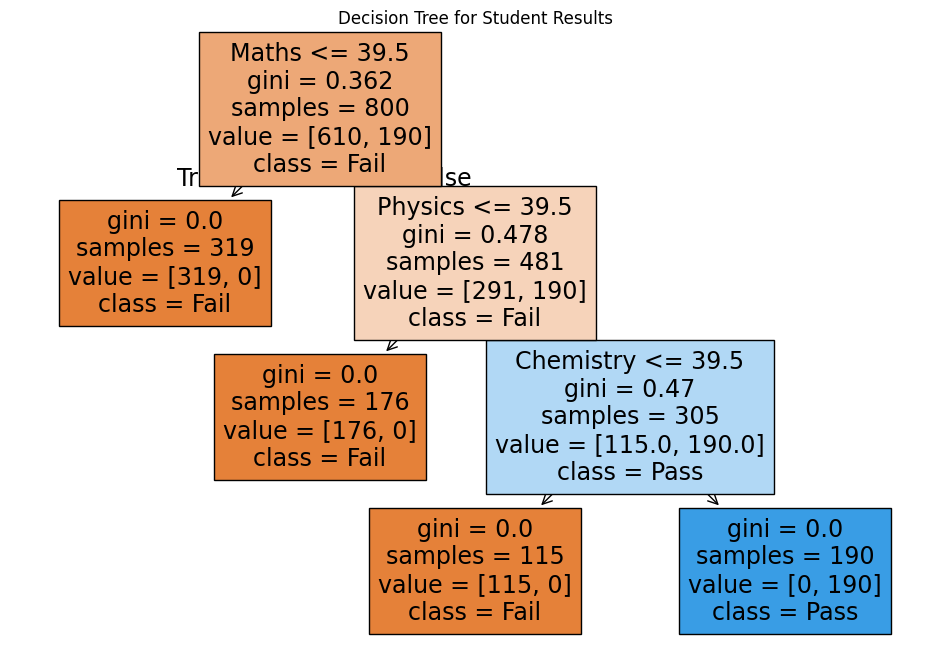

In [26]:
# Visualize the Decision Tree
# Set up the plot
plt.figure(figsize=(12, 8))
tree.plot_tree(model, feature_names=['Maths', 'Physics', 'Chemistry'], class_names=['Fail', 'Pass'], filled=True)
plt.title("Decision Tree for Student Results")
plt.show()

In [27]:
# Display the feature importance
feature_importance=model.feature_importances_
print("Feature_importance:")
print(f"Maths:{feature_importance[0]:.2f}")
print(f"Physics:{feature_importance[1]:.2f}")
print(f"Chemistry:{feature_importance[2]:.2f}")

Feature_importance:
Maths:0.21
Physics:0.30
Chemistry:0.49


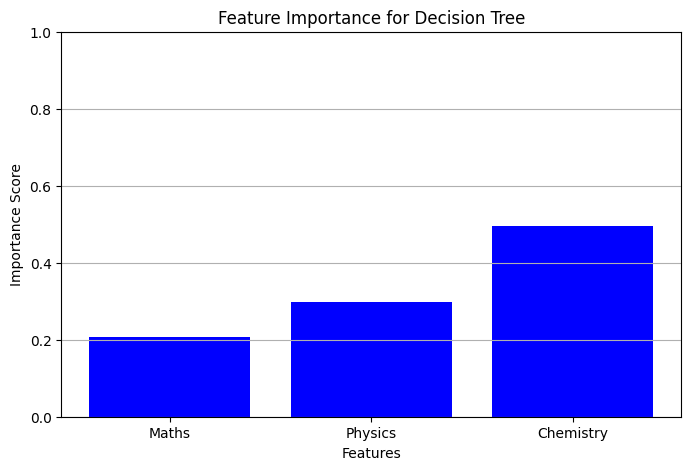

In [28]:
# Bar chart for feature importance
features = ["Maths", "Physics", "Chemistry"]
plt.figure(figsize=(8, 5))
plt.bar(features, feature_importance, color='blue')
plt.title('Feature Importance for Decision Tree')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.ylim(0, 1)  # Set y-axis limits
plt.grid(axis='y')
plt.show()

Create bar chart

In [29]:
# Create a 'Pass' column based on the condition that scores must be >40 in all subjects
data['Pass'] = (data['Maths'] > 40) & (data['Physics'] > 40) & (data['Chemistry'] > 40)
data['Pass'] = data['Pass'].astype(int)  # Convert boolean to int (1 for Pass, 0 for Fail)

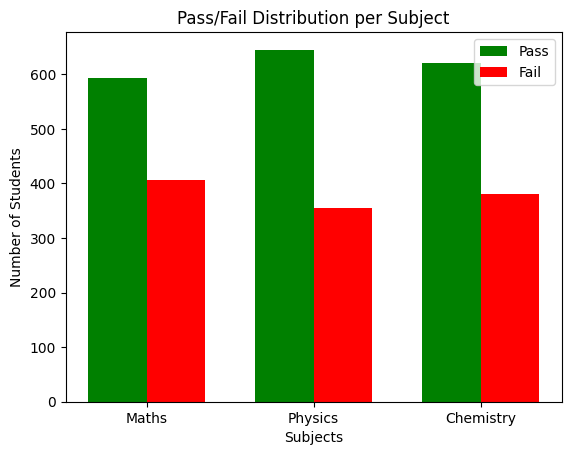

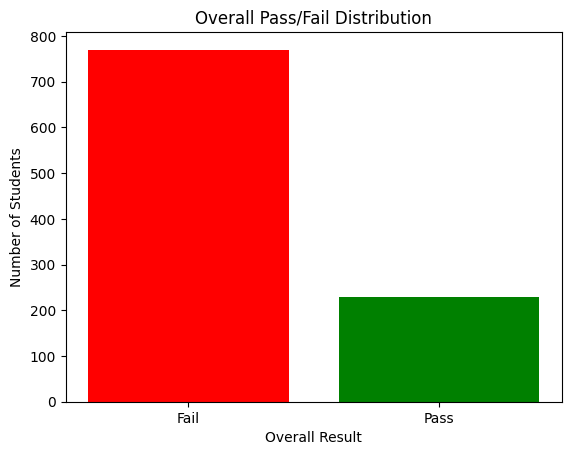

In [30]:
# Function to create bar charts for subject-wise pass/fail
def plot_pass_fail(data):
    subjects = ['Maths', 'Physics', 'Chemistry']
    pass_counts = [data[data[subject] > 40].shape[0] for subject in subjects]
    fail_counts = [data[data[subject] <= 40].shape[0] for subject in subjects]

    # Bar chart for individual subjects
    bar_width = 0.35
    index = range(len(subjects))

    plt.bar(index, pass_counts, bar_width, label='Pass', color='green')
    plt.bar([i + bar_width for i in index], fail_counts, bar_width, label='Fail', color='red')

    plt.xlabel('Subjects')
    plt.ylabel('Number of Students')
    plt.title('Pass/Fail Distribution per Subject')
    plt.xticks([i + bar_width / 2 for i in index], subjects)
    plt.legend()
    plt.show()

# Create a bar chart for each subject
plot_pass_fail(data)

# Overall Pass/Fail Chart
overall_pass = data['Pass'].value_counts()

plt.bar(overall_pass.index, overall_pass.values, color=['red', 'green'], tick_label=['Fail', 'Pass'])
plt.xlabel('Overall Result')
plt.ylabel('Number of Students')
plt.title('Overall Pass/Fail Distribution')
plt.show()

Enter Maths score: 35
Enter Physics score: 69
Enter Chemistry score: 78
The predicted result for the student is: Fail


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


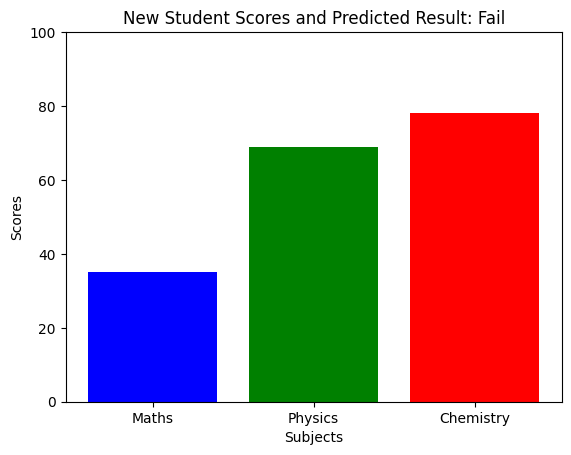

In [31]:
# Function to predict result for a new student based on trained model
def predict_new_student(maths_score, physics_score, chemistry_score):
    new_data = [[maths_score, physics_score, chemistry_score]]  # New input as a 2D array
    prediction = model.predict(new_data)  # Use the trained model to predict
    result = "Pass" if prediction[0] == 1 else "Fail"
    return result

# Example: Predicting for a new student with user inputs
maths = int(input("Enter Maths score: "))
physics = int(input("Enter Physics score: "))
chemistry = int(input("Enter Chemistry score: "))

# Get prediction using the trained model
prediction = predict_new_student(maths, physics, chemistry)
print(f"The predicted result for the student is: {prediction}")

# Creating the bar chart for the new student's scores
subjects = ['Maths', 'Physics', 'Chemistry']
scores = [maths, physics, chemistry]

# Plot the bar chart
plt.bar(subjects, scores, color=['blue', 'green', 'red'])
plt.xlabel('Subjects')
plt.ylabel('Scores')
plt.title(f'New Student Scores and Predicted Result: {prediction}')
plt.ylim(0, 100)

# Show the chart
plt.show()